In [1]:
import sys
sys.path.append("../")


In [2]:
from src.black_scholes import bs_call_price

price = bs_call_price(
    S=100,
    K=100,
    T=1,
    r=0.05,
    sigma=0.2
)

price


np.float64(10.450583572185565)

In [3]:
from src.data_loader import get_spy_price

S = get_spy_price()
S


np.float64(691.9600219726562)

In [4]:
import yfinance as yf

spy = yf.Ticker("SPY")
spy.options


('2026-02-12',
 '2026-02-13',
 '2026-02-17',
 '2026-02-18',
 '2026-02-19',
 '2026-02-20',
 '2026-02-23',
 '2026-02-24',
 '2026-02-25',
 '2026-02-27',
 '2026-03-06',
 '2026-03-13',
 '2026-03-20',
 '2026-03-27',
 '2026-03-31',
 '2026-04-17',
 '2026-04-30',
 '2026-05-15',
 '2026-05-29',
 '2026-06-18',
 '2026-06-30',
 '2026-07-31',
 '2026-08-21',
 '2026-09-18',
 '2026-09-30',
 '2026-12-18',
 '2026-12-31',
 '2027-01-15',
 '2027-03-19',
 '2027-06-17',
 '2027-12-17',
 '2028-01-21',
 '2028-06-16',
 '2028-12-15')

In [5]:
expiry = spy.options[0]
calls = spy.option_chain(expiry).calls

calls.head()


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPY260212C00500000,2026-02-11 19:33:44+00:00,500.0,195.04,0.0,0.0,0.0,0.0,4.0,0,0.00001,True,REGULAR,USD
1,SPY260212C00565000,2026-02-04 15:39:21+00:00,565.0,124.88,0.0,0.0,0.0,0.0,NaN,0,0.00001,True,REGULAR,USD
2,SPY260212C00570000,2026-01-30 15:52:21+00:00,570.0,123.80,0.0,0.0,0.0,0.0,1.0,0,0.00001,True,REGULAR,USD
3,SPY260212C00595000,2026-02-11 14:40:35+00:00,595.0,100.71,0.0,0.0,0.0,0.0,2.0,0,0.00001,True,REGULAR,USD
4,SPY260212C00600000,2026-02-06 20:07:08+00:00,600.0,89.76,0.0,0.0,0.0,0.0,58.0,0,0.00001,True,REGULAR,USD


In [8]:
from src.implied_vol import implied_vol_call

r = 0.05
T = 30 / 365

row = calls.iloc[5]

K = row["strike"]
market_price = (row["bid"] + row["ask"]) / 2


iv = implied_vol_call(market_price, S, K, T, r)

iv


nan

In [7]:
import pandas as pd
from datetime import datetime

expiry_date = pd.to_datetime(expiry)
today = pd.to_datetime(datetime.today().date())

T = (expiry_date - today).days / 365

T


0.0

In [9]:
iv = implied_vol_call(market_price, S, K, T, r)
iv


nan

In [10]:
print("S:", S)
print("K:", K)
print("T:", T)
print("Market Price:", market_price)


S: 691.9600219726562
K: 605.0
T: 0.0821917808219178
Market Price: 0.0


In [11]:
import numpy as np

lower_bound = max(S - K * np.exp(-r*T), 0)
upper_bound = S

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)


Lower bound: 89.44122149531267
Upper bound: 691.9600219726562


In [12]:
clean_calls = calls.copy()

# Remove zero bid/ask
clean_calls = clean_calls[
    (clean_calls["bid"] > 0) &
    (clean_calls["ask"] > 0)
]

clean_calls.head()


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency


In [13]:
clean_calls["moneyness"] = abs(clean_calls["strike"] - S)

clean_calls = clean_calls.sort_values("moneyness")

clean_calls.head()



,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,moneyness


In [14]:
row = clean_calls.iloc[0]


IndexError: single positional indexer is out-of-bounds

In [15]:
market_price = (row["bid"] + row["ask"]) / 2
K = row["strike"]


In [16]:
iv = implied_vol_call(market_price, S, K, T, r)
iv


nan

In [17]:
row = clean_calls.iloc[0]
print(row["strike"])


IndexError: single positional indexer is out-of-bounds

In [18]:
len(clean_calls)


0

In [19]:
calls[["strike", "bid", "ask"]].head(20)


,strike,bid,ask
0,500.0,0.0,0.0
1,565.0,0.0,0.0
2,570.0,0.0,0.0
3,595.0,0.0,0.0
4,600.0,0.0,0.0
5,605.0,0.0,0.0
6,615.0,0.0,0.0
7,620.0,0.0,0.0
8,625.0,0.0,0.0
9,630.0,0.0,0.0


In [38]:
expiry = spy.options[30]


In [39]:
calls = spy.option_chain(expiry).calls


In [40]:
clean_calls = calls[
    (calls["bid"] > 0) &
    (calls["ask"] > 0)
]


In [41]:
len(clean_calls)


31

In [42]:
clean_calls = calls[
    (calls["ask"] > 0)
]


In [43]:
clean_calls["moneyness"] = abs(clean_calls["strike"] - S)

clean_calls = clean_calls.sort_values("moneyness")

clean_calls[["strike", "moneyness"]].head()


,strike,moneyness
63,495.0,196.960022
145,905.0,213.039978
57,465.0,226.960022
53,445.0,246.960022
153,945.0,253.039978


In [44]:
row = clean_calls.iloc[0]

print("Strike:", row["strike"])
print("Bid:", row["bid"])
print("Ask:", row["ask"])


Strike: 495.0
Bid: 232.51
Ask: 237.5


In [45]:
market_price = (row["bid"] + row["ask"]) / 2
K = row["strike"]

print("Mid Price:", market_price)


Mid Price: 235.005


In [46]:
import pandas as pd
from datetime import datetime

expiry_date = pd.to_datetime(expiry)
today = pd.to_datetime(datetime.today().date())

T = (expiry_date - today).days / 365

print("Time to maturity:", T)


Time to maturity: 1.8438356164383563


In [47]:
iv = implied_vol_call(market_price, S, K, T, r)

print("Implied Vol:", iv)


Implied Vol: nan


In [48]:
import numpy as np

lower_bound = max(S - K * np.exp(-r*T), 0)
upper_bound = S

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Market Price:", market_price)


Lower Bound: 240.5545521617061
Upper Bound: 691.9600219726562
Market Price: 235.005


In [49]:
print("Strike:", K)
print("Spot:", S)


Strike: 495.0
Spot: 691.9600219726562


In [50]:
clean_calls[["strike", "moneyness"]].head(5)


,strike,moneyness
63,495.0,196.960022
145,905.0,213.039978
57,465.0,226.960022
53,445.0,246.960022
153,945.0,253.039978


In [51]:
print("S:", S)
print("K:", K)
print("T:", T)
print("r:", r)
print("Market Price:", market_price)


S: 691.9600219726562
K: 495.0
T: 1.8438356164383563
r: 0.05
Market Price: 235.005


In [52]:
spy.options


('2026-02-12',
 '2026-02-13',
 '2026-02-17',
 '2026-02-18',
 '2026-02-19',
 '2026-02-20',
 '2026-02-23',
 '2026-02-24',
 '2026-02-25',
 '2026-02-27',
 '2026-03-06',
 '2026-03-13',
 '2026-03-20',
 '2026-03-27',
 '2026-03-31',
 '2026-04-17',
 '2026-04-30',
 '2026-05-15',
 '2026-05-29',
 '2026-06-18',
 '2026-06-30',
 '2026-07-31',
 '2026-08-21',
 '2026-09-18',
 '2026-09-30',
 '2026-12-18',
 '2026-12-31',
 '2027-01-15',
 '2027-03-19',
 '2027-06-17',
 '2027-12-17',
 '2028-01-21',
 '2028-06-16',
 '2028-12-15')

In [53]:
import pandas as pd

today = pd.Timestamp.today()

expiry_table = []

for e in spy.options:
    d = pd.to_datetime(e)
    days = (d - today).days
    expiry_table.append((e, days))

expiry_table


[('2026-02-12', -1),
 ('2026-02-13', 0),
 ('2026-02-17', 4),
 ('2026-02-18', 5),
 ('2026-02-19', 6),
 ('2026-02-20', 7),
 ('2026-02-23', 10),
 ('2026-02-24', 11),
 ('2026-02-25', 12),
 ('2026-02-27', 14),
 ('2026-03-06', 21),
 ('2026-03-13', 28),
 ('2026-03-20', 35),
 ('2026-03-27', 42),
 ('2026-03-31', 46),
 ('2026-04-17', 63),
 ('2026-04-30', 76),
 ('2026-05-15', 91),
 ('2026-05-29', 105),
 ('2026-06-18', 125),
 ('2026-06-30', 137),
 ('2026-07-31', 168),
 ('2026-08-21', 189),
 ('2026-09-18', 217),
 ('2026-09-30', 229),
 ('2026-12-18', 308),
 ('2026-12-31', 321),
 ('2027-01-15', 336),
 ('2027-03-19', 399),
 ('2027-06-17', 489),
 ('2027-12-17', 672),
 ('2028-01-21', 707),
 ('2028-06-16', 854),
 ('2028-12-15', 1036)]

In [54]:
target = [
    e for e, d in expiry_table
    if 25 <= d <= 45
][0]

target


'2026-03-13'

In [55]:
expiry = target
calls = spy.option_chain(expiry).calls


In [56]:
expiry = target
calls = spy.option_chain(expiry).calls


In [57]:
clean_calls = calls[
    (calls["bid"] > 0) &
    (calls["ask"] > 0)
]

clean_calls["moneyness"] = abs(clean_calls["strike"] - S)
clean_calls = clean_calls.sort_values("moneyness")


In [58]:
expiry_date = pd.to_datetime(expiry)
today = pd.Timestamp.today()

T = (expiry_date - today).days / 365


In [59]:
print("T:", T)

T: 0.07671232876712329


In [60]:
New T =
New K =
New Market Price =


SyntaxError: invalid syntax (1134571606.py, line 1)

In [61]:
print("K:", K)
print("T:", T)
print("Market Price:", market_price)

K: 495.0
T: 0.07671232876712329
Market Price: 235.005


In [62]:
calls = spy.option_chain(expiry).calls


In [63]:
clean_calls = calls[
    (calls["bid"] > 0) &
    (calls["ask"] > 0)
].copy()


In [64]:
clean_calls["moneyness"] = abs(clean_calls["strike"] - S)


In [65]:
clean_calls = clean_calls.sort_values("moneyness")


In [66]:
clean_calls[["strike", "moneyness"]].head()


,strike,moneyness
64,692.0,0.039978
63,691.0,0.960022
65,693.0,1.039978
62,690.0,1.960022
66,694.0,2.039978


In [67]:
row = clean_calls.iloc[0]

print("Strike:", row["strike"])


Strike: 692.0


In [68]:
clean_calls[["strike", "moneyness"]].head()


,strike,moneyness
64,692.0,0.039978
63,691.0,0.960022
65,693.0,1.039978
62,690.0,1.960022
66,694.0,2.039978


In [69]:
row = clean_calls.iloc[0]

K = row["strike"]
bid = row["bid"]
ask = row["ask"]

market_price = (bid + ask) / 2

print("S:", S)
print("K:", K)
print("Bid:", bid)
print("Ask:", ask)
print("Mid Price:", market_price)


S: 691.9600219726562
K: 692.0
Bid: 9.82
Ask: 9.84
Mid Price: 9.83


In [70]:
import numpy as np

lower_bound = max(S - K * np.exp(-r*T), 0)
upper_bound = S

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Market Price:", market_price)


Lower Bound: 2.609184714056937
Upper Bound: 691.9600219726562
Market Price: 9.83


In [71]:
iv = implied_vol_call(market_price, S, K, T, r)

print("Implied Volatility:", iv)


Implied Volatility: 0.11088146130302426


In [72]:
ivs = []

for _, row in clean_calls.iterrows():
    K = row["strike"]
    mid = (row["bid"] + row["ask"]) / 2
    
    iv = implied_vol_call(mid, S, K, T, r)
    
    ivs.append((K, iv))

iv_df = pd.DataFrame(ivs, columns=["strike", "iv"])

iv_df = iv_df.dropna()

iv_df.head()


,strike,iv
0,692.0,0.110881
1,691.0,0.109616
2,693.0,0.109785
3,690.0,0.108681
4,694.0,0.108385


In [73]:
iv_df["moneyness"] = iv_df["strike"] / S


Matplotlib is building the font cache; this may take a moment.


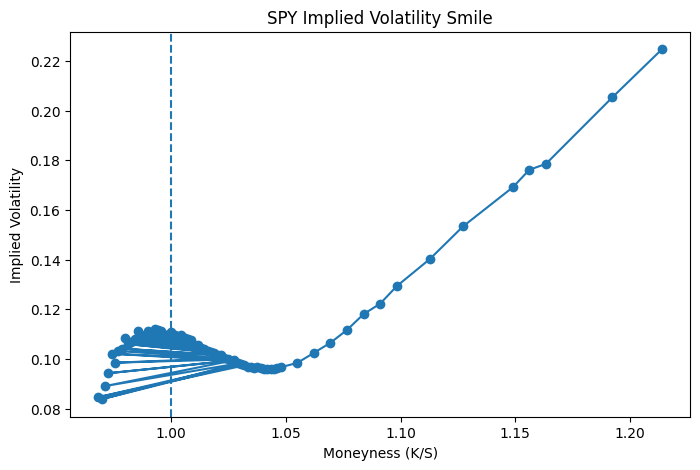

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(iv_df["moneyness"], iv_df["iv"], marker="o")
plt.axvline(1, linestyle="--")
plt.xlabel("Moneyness (K/S)")
plt.ylabel("Implied Volatility")
plt.title("SPY Implied Volatility Smile")
plt.show()


In [75]:
iv_df = iv_df.sort_values("moneyness")


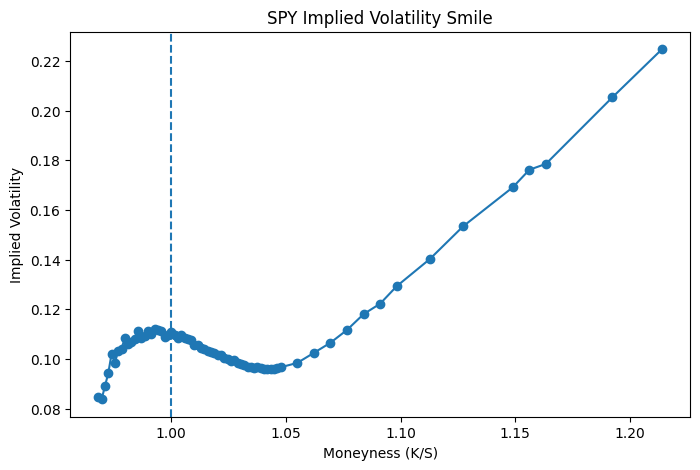

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(iv_df["moneyness"], iv_df["iv"], marker="o")
plt.axvline(1, linestyle="--")
plt.xlabel("Moneyness (K/S)")
plt.ylabel("Implied Volatility")
plt.title("SPY Implied Volatility Smile")
plt.show()

In [ ]:
The implied volatility surface exhibits pronounced skew and curvature, with elevated implied volatility for both deep out-of-the-money puts and calls. This pattern reflects asymmetric tail risk and contradicts the constant-volatility assumption underlying the Black–Scholes model.

In [78]:
import numpy as np

x = iv_df["moneyness"].values
y = iv_df["iv"].values

coeffs = np.polyfit(x, y, 2)

coeffs


array([ 3.21533705, -6.5022817 ,  3.38812009])